In [1]:
from langgraph.graph import StateGraph, START, END

In [2]:
from typing import TypedDict

In [3]:
from initialize_the_llm import llm

In [4]:
class State(TypedDict):
    topic: str
    joke: str
    story: str
    poem: str
    combined_output: str

In [5]:
def call_llm_1(state: State):
    """调用LLM生成笑话"""
    messages = [
        ("system", "你是个乐于助人、通情达理的智能助手，在回答用户的问题时请尽量使用简短的语言，通过纯文本的格式输出。"),
        ("human", f"帮我写一个关于{state['topic']}的笑话。"),
    ]
    msg = llm.invoke(messages)
    return {"joke": msg.content}

In [6]:
def call_llm_2(state: State):
    """调用LLM生成故事"""

    messages = [
        ("system", "你是个乐于助人、通情达理的智能助手，在回答用户的问题时请尽量使用简短的语言，通过纯文本的格式输出。"),
        ("human", f"帮我写一个关于{state['topic']}的故事。"),
    ]
    msg = llm.invoke(messages)
    return {"story": msg.content}

In [7]:
def call_llm_3(state: State):
    """调用LLM生成诗歌"""

    messages = [
        ("system", "你是个乐于助人、通情达理的智能助手，在回答用户的问题时请尽量使用简短的语言，通过纯文本的格式输出。"),
        ("human", f"帮我写一首关于{state['topic']}的诗。"),
    ]
    msg = llm.invoke(messages)
    return {"poem": msg.content}

In [8]:
def aggregator(state: State):
    """把笑话、故事和诗合成一个单独的输出"""

    combined = f"这里有关于{state['topic']}的笑话、故事和诗！\n\n"
    combined += f"笑话：\n{state['joke']}\n\n"
    combined += f"故事：\n{state['story']}\n\n"
    combined += f"诗：\n{state['poem']}"
    return {"combined_output": combined}

In [9]:
parallel_builder = StateGraph(State)

In [10]:
parallel_builder.add_node("call_llm_1", call_llm_1)
parallel_builder.add_node("call_llm_2", call_llm_2)
parallel_builder.add_node("call_llm_3", call_llm_3)
parallel_builder.add_node("aggregator", aggregator)

In [11]:
parallel_builder.add_edge(START, "call_llm_1")
parallel_builder.add_edge(START, "call_llm_2")
parallel_builder.add_edge(START, "call_llm_3")
parallel_builder.add_edge("call_llm_1", "aggregator")
parallel_builder.add_edge("call_llm_2", "aggregator")
parallel_builder.add_edge("call_llm_3", "aggregator")
parallel_builder.add_edge("aggregator", END)

In [12]:
parallel_workflow = parallel_builder.compile()

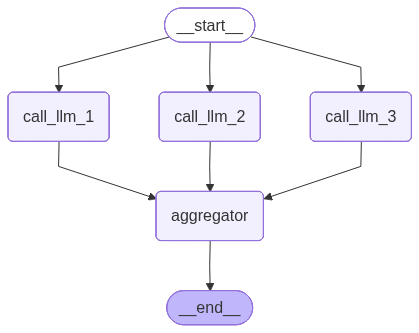

In [13]:
parallel_workflow

In [14]:
state = parallel_workflow.invoke({'topic': "沙尘暴"})

In [15]:
state

{'topic': '沙尘暴',
 'joke': '为什么沙尘暴从不迷路？  \n因为它走到哪儿都带着导航（沙）！',
 'story': '狂风卷起漫天黄沙，遮天蔽日。老牧民巴特尔眯着眼，在能见度不足十米的沙尘中艰难前行。\n\n他的羊群被这场突如其来的沙尘暴冲散了。风沙像鞭子一样抽打在脸上，但他仍坚持呼喊着，寻找走失的羊只。\n\n就在他快要放弃时，远处传来微弱的叫声。循声而去，发现三只小羊蜷缩在岩石后。他赶紧用外套裹住它们，顶着风沙往回走。\n\n回到家时，妻子早已备好热茶。虽然损失了五只羊，但巴特尔望着救回的小羊，眼里仍有欣慰。这场沙尘暴让他明白，在这片土地上，人与自然的抗争从未停止，但希望永远都在。',
 'poem': '黄沙蔽日天，\n狂风卷地烟。\n行人掩面走，\n万物尽昏眠。',
 'combined_output': '这里有关于沙尘暴的笑话、故事和诗！\n\n笑话：\n为什么沙尘暴从不迷路？  \n因为它走到哪儿都带着导航（沙）！\n\n故事：\n狂风卷起漫天黄沙，遮天蔽日。老牧民巴特尔眯着眼，在能见度不足十米的沙尘中艰难前行。\n\n他的羊群被这场突如其来的沙尘暴冲散了。风沙像鞭子一样抽打在脸上，但他仍坚持呼喊着，寻找走失的羊只。\n\n就在他快要放弃时，远处传来微弱的叫声。循声而去，发现三只小羊蜷缩在岩石后。他赶紧用外套裹住它们，顶着风沙往回走。\n\n回到家时，妻子早已备好热茶。虽然损失了五只羊，但巴特尔望着救回的小羊，眼里仍有欣慰。这场沙尘暴让他明白，在这片土地上，人与自然的抗争从未停止，但希望永远都在。\n\n诗：\n黄沙蔽日天，\n狂风卷地烟。\n行人掩面走，\n万物尽昏眠。'}

In [16]:
print(state['combined_output'])

这里有关于沙尘暴的笑话、故事和诗！

笑话：
为什么沙尘暴从不迷路？  
因为它走到哪儿都带着导航（沙）！

故事：
狂风卷起漫天黄沙，遮天蔽日。老牧民巴特尔眯着眼，在能见度不足十米的沙尘中艰难前行。

他的羊群被这场突如其来的沙尘暴冲散了。风沙像鞭子一样抽打在脸上，但他仍坚持呼喊着，寻找走失的羊只。

就在他快要放弃时，远处传来微弱的叫声。循声而去，发现三只小羊蜷缩在岩石后。他赶紧用外套裹住它们，顶着风沙往回走。

回到家时，妻子早已备好热茶。虽然损失了五只羊，但巴特尔望着救回的小羊，眼里仍有欣慰。这场沙尘暴让他明白，在这片土地上，人与自然的抗争从未停止，但希望永远都在。

诗：
黄沙蔽日天，
狂风卷地烟。
行人掩面走，
万物尽昏眠。
